In [5]:
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX

root = os.path.join("..","Data")
sales_df = pd.read_excel(os.path.join(root, "DEMAND_FILE_PHASE2.xlsx"))
sales_df = sales_df.iloc[0:2].T.reset_index(drop=True)
sales_df.columns = ['Date','Sales']
sales_df.drop(0, inplace=True)
sales_df['Sales'] = sales_df['Sales'].astype('float')
sales_df['Date'] = pd.to_datetime(sales_df['Date'])


sales_df.set_index('Date', inplace=True)
sales_df.drop(columns=['Date'], inplace=True, errors='ignore') 

sales_df

,Sales
Date,
2020-04-01,27116.257595
2020-04-02,28710.388430
2020-04-03,30728.165560
2020-04-04,31766.156375
2020-04-05,24258.566380
...,...
2024-12-27,267775.000000
2024-12-28,274362.000000
2024-12-29,244200.000000


In [6]:
# Define SARIMAX model parameters
# Order = (p, d, q), Seasonal_order = (P, D, Q, s)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # seasonal period = 12 (monthly seasonality)

# Fit the SARIMAX model
model = SARIMAX(sales_df, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

# Print summary
print(results.summary())

c:\Users\milan\Desktop\CDIS Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\milan\Desktop\CDIS Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                 1732
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -20328.969
Date:                            Tue, 15 Apr 2025   AIC                          40667.938
Time:                                    13:11:20   BIC                          40695.186
Sample:                                         0   HQIC                         40678.020
                                           - 1732                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7263      0.033     21.839      0.000       0.661       0.791
ma.L1         -0.9505      0.022   

In [16]:
forecast_index

DatetimeIndex(['2025-01-31', '2025-02-01', '2025-02-02', '2025-02-03',
               '2025-02-04', '2025-02-05', '2025-02-06', '2025-02-07',
               '2025-02-08', '2025-02-09', '2025-02-10', '2025-02-11'],
              dtype='datetime64[ns]', freq='D')

c:\Users\milan\Desktop\CDIS Project\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ValueError: x and y must have same first dimension, but have shapes (1,) and (12,)

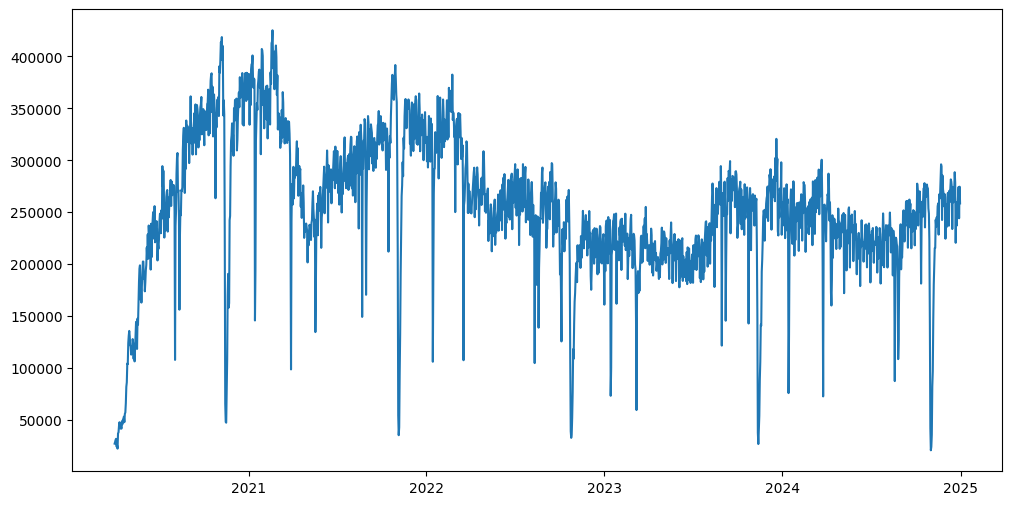

In [ ]:
import matplotlib.pyplot as plt
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=sales_df.index[-1] + pd.DateOffset(months=1), periods=12, freq='D')
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sales_df, label='Observed')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()